# Clasificador Binario

## Librerías

In [1]:
!pip install fastai -Uq

#Reiniciamos el entorno de ejecución automáticamente
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

     |████████████████████████████████| 197 kB 30.7 MB/s 
     |████████████████████████████████| 60 kB 8.4 MB/s 


{'restart': True, 'status': 'ok'}

In [1]:
from fastai.vision.all import *

## Dataset

En este caso estamos usando el dataset que ha sido preprocesados mediante el método de recorte

In [2]:
!wget https://www.dropbox.com/s/o1eaoae59qgdo4i/Training_Set_Pre.zip?dl=0 --no-verbose -O train.zip
!wget https://www.dropbox.com/s/5od5cac9xhxlcwu/Test_Set_Pre.zip?dl=0 --no-verbose -O test.zip
!wget https://www.dropbox.com/s/gjz445xm4oddfus/Evaluation_Set_Pre.zip?dl=0 --no-verbose -O val.zip


2022-06-13 15:14:16 URL:https://uca9b1909699cb9052da9e539b82.dl.dropboxusercontent.com/cd/0/inline2/BnJ1NCd7_ihqPsjv2aqtGSqUb5VZrW6lbAVxfJ5dlQB7iD_fdglTDXaxr5zFrtE2uOWCj6gX2lpBLI9r6EHCYzpMhwe2R0abgxLUnGifD6wjNMsrEj16bcGs6uvci32k1WRFl56Dk_gEOTymwxWmpvLZMb-yStGq6y21fKrVj98YQFGhdVUZXn3NgtmXwbVpAEWUCdgZBMp-vpvZ-JKNtMKyK4lSHxs1uPN3w7mou8d38tVietILlKyPs2-k7MOP_5LP9ekekQuGHmxmSfyw9B3iZoJktFLV0N60ws2_zeZFsEXNCIvO62VPT5dgC7SRJqNoT1v77cGCJ6hOq79tD1Q4Gtm9KiQIgSqJXTBsT4eTnxVovXU8CLySTz3WY4rSF5iW9yJ3HxmIZNN4xhfdl_5FErxopIFDDz75aqr9ytNArw/file [138777773/138777773] -> "train.zip" [1]
2022-06-13 15:14:18 URL:https://uc2b6613803973fa207fe4216971.dl.dropboxusercontent.com/cd/0/inline2/BnLBsHPJXlc4g0Zh59r6N1IBXPCfakaG4D6EkSTC5KjfATP-w1Nj8JHAfXrlZvztx5hAQHe8SERIKq32t_5ryUAUq1g89sBb1RvHCdo5APkKIbtVHsEy0a1HjbczcTP9LCJXfmwlXlmcxvwjr2mIKRfzUg0rOUw1FW8H5tV_3VS5eymR78fqslHAl1K_Fbxd8Ujl-t-suMEoWhL3pqeqNVTym_YBPVL7OCfK2F9vsxwmTz0M-JaKBPJ4NoDkogu4BYRVoQNFCIKsDrD5JhnFbrnXO1KjO1LoP9BZJz5HMkER4FONJUWQ891fNeJDTZAK_Xb

In [3]:
# !rm -rvf Training_Set_Pre
!unzip -qq train.zip #-qq no verbose
!unzip -qq test.zip
!unzip -qq val.zip

Tenemos que cambiar la estructura del dataset


```.
└── dataset
    ├── train
    │   ├── normal
    │   └── enfermedad
    ├── test
    │   ├── normal
    │   └── enfermedad
    └── validation
        ├── normal
        └── enfermedad
```

Para ello usaremos el archivo csv de cada conjunto para mover cada imagen a donde corresponda

In [4]:
#Train Normal y Enfermedad
trainN='dataset/train/normal'
trainE='dataset/train/enfermedad'

testN='dataset/test/normal'
testE='dataset/test/enfermedad'

valN='dataset/val/normal'
valE='dataset/val/enfermedad'

train='dataset/train'
test='dataset/test'
val='dataset/val'

!mkdir dataset

!mkdir '$train'
!mkdir '$test'
!mkdir '$val'

!mkdir "$trainN"
!mkdir "$trainE"

!mkdir "$testN"
!mkdir "$testE"

!mkdir "$valN"
!mkdir "$valE"

Creamos un path que apunte a la carpeta donde vamos a tener el dataset estructurado posteriormente:

In [5]:
path = Path('dataset/')

In [6]:
trainPath = Path('Training_Set_Pre/')
testPath  = Path('Test_Set_Pre/')
valPath  =  Path('Evaluation_Set_Pre/')

In [7]:
df_train = pd.read_csv(str(trainPath) + '/train.csv')
df_test = pd.read_csv(str(testPath) + '/test.csv')
df_val = pd.read_csv(str(valPath) + '/val.csv')

In [8]:
#1519 tienen enfermedad y 401 no la tienen
df_train['Disease_Risk'].value_counts()

1    1519
0     401
Name: Disease_Risk, dtype: int64

In [9]:
df_val['Disease_Risk'].value_counts() #506 - 134
df_test['Disease_Risk'].value_counts()

1    506
0    134
Name: Disease_Risk, dtype: int64

Una vez creada la estructura mencionada antes movemos las imágenes a la carpeta que corresponda. Repetimos esto para los tres conjuntos.

In [10]:
import shutil
for id, enf in zip(df_train['ID'], df_train['Disease_Risk']):
    if(int(enf)==0):
        shutil.move(str(trainPath)+'/Training/' + str(id) + '.png', trainN)
    else:
        shutil.move(str(trainPath)+'/Training/' + str(id) + '.png', trainE)

In [11]:
for id, enf in zip(df_test['ID'], df_test['Disease_Risk']):
    if(int(enf)==0):
        shutil.move(str(testPath)+'/Test/' + str(id) + '.png', testN)
    else:
        shutil.move(str(testPath)+'/Test/' + str(id) + '.png', testE)

In [12]:
for id, enf in zip(df_val['ID'], df_val['Disease_Risk']):
    if(int(enf)==0):
        shutil.move(str(valPath)+'/Validation/' + str(id) + '.png', valN)
    else:
        shutil.move(str(valPath)+'/Validation/' + str(id) + '.png', valE)

In [13]:
#Hemos movido las imágenes correctamente
len(Path(trainN).ls()) #401
len(Path(trainE).ls()) #1519

1519

In [14]:
len(Path(trainPath/'Training').ls()) #1921
len(Path(testPath/'Test').ls())      #640
len(Path(valPath/'Validation').ls()) #640

0

In [19]:
len(Path('dataset/train/normal').ls()) #401

401

Ahora que ya tenemos la estructura deseado empezamos a construir el modelo:

In [15]:
trainPath = Path('dataset/train')

## Cargando el dataset

In [16]:
db = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),
                 get_y=parent_label,
                 item_tfms = Resize(256),
                 batch_tfms=aug_transforms(size=128,min_scale=0.75))

In [17]:
dls = db.dataloaders(trainPath,bs=128)

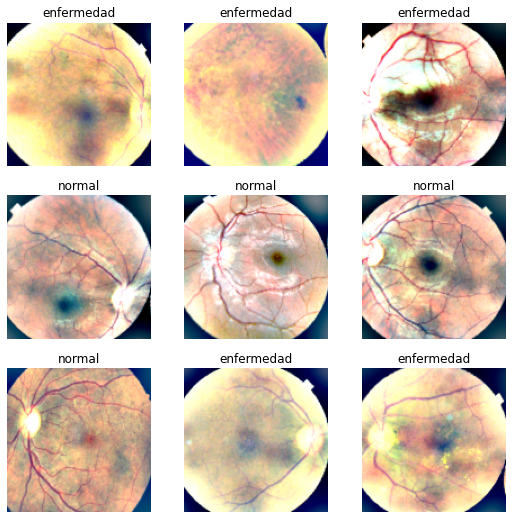

In [18]:
dls.show_batch()

In [ ]:
callbacks = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=20),
    SaveModelCallback(fname='modelResnet18')  
]

In [ ]:
learn = cnn_learner(dls,resnet18,metrics=accuracy,cbs=callbacks).to_fp16()


/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


SuggestedLRs(minimum=0.017378008365631102, steep=1.5848931980144698e-06, valley=0.0008317637839354575, slide=0.010964781977236271)

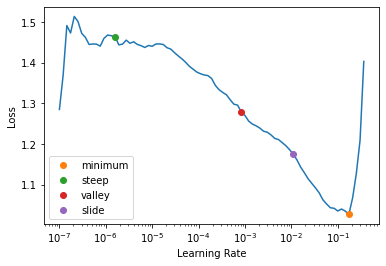

In [ ]:
learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

## Entrenamos el modelo

epoch,train_loss,valid_loss,accuracy,time
0,1.245881,2.301375,0.651042,00:06


Better model found at epoch 0 with valid_loss value: 2.301374673843384.


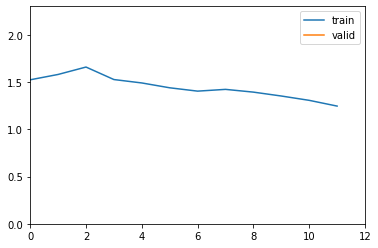

epoch,train_loss,valid_loss,accuracy,time
0,0.882838,3.654857,0.544271,00:06
1,0.620161,0.858502,0.838542,00:06
2,0.521200,0.742234,0.802083,00:06
3,0.458341,0.509402,0.841146,00:06
4,0.408998,0.561093,0.755208,00:06
5,0.378246,0.356126,0.864583,00:07
6,0.352975,1.347095,0.682292,00:06
7,0.329039,0.882714,0.835938,00:06
8,0.312188,0.313355,0.872396,00:06
9,0.304840,5.706014,0.526042,00:07


Better model found at epoch 0 with valid_loss value: 3.6548569202423096.


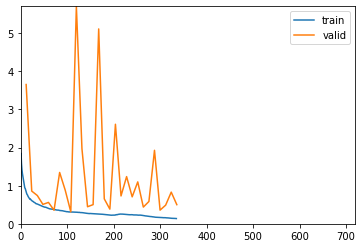

Better model found at epoch 1 with valid_loss value: 0.8585020899772644.
Better model found at epoch 2 with valid_loss value: 0.7422336935997009.
Better model found at epoch 3 with valid_loss value: 0.5094016790390015.
Better model found at epoch 5 with valid_loss value: 0.35612645745277405.
Better model found at epoch 8 with valid_loss value: 0.31335505843162537.
No improvement since epoch 8: early stopping


In [ ]:
learn.fine_tune(60,base_lr=1e-1)

Exportamos el modelo

In [ ]:
learn.to_fp32()
learn.export('modeloBinario.pkl')

## Evaluando el modelo

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(256),
                 batch_tfms=aug_transforms(size=128,min_scale=0.75))
dlsTest = dbTest.dataloaders(path,bs=128)

In [ ]:
learn.dls = dlsTest

El valor de la función de perdida es de 0.53 y su accuracy es del 74.5%.

In [ ]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.824999988079071.


(#2) [0.3612064719200134,0.824999988079071]

## Interpretación del modelo

In [ ]:
learn.dls=dls

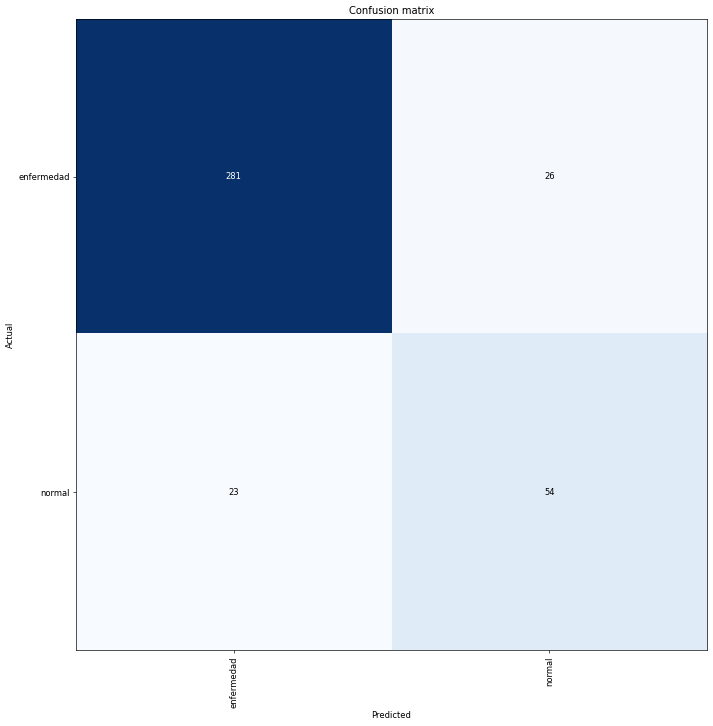

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)